# Logistic Regression Model Implementation in Python

### Source: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/far-sig/Portfolio/main/Datasets/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes = diabetes.rename(columns={'Pregnancies': "Number of Pregenancies", 'Glucose': "Glucose Level", 'BloodPressure': "Blood Pressure", 'SkinThickness' : 'Skin Thickness', 'Insulin' : 'Insulin Level', 'BMI' : 'Body Mass Index' , 'DiabetesPedigreeFunction' : 'Diabetes Percentage', 'Outcome' : 'Diabetes?'})
diabetes

,Number of Pregenancies,Glucose Level,Blood Pressure,Skin Thickness,Insulin Level,Body Mass Index,Diabetes Percentage,Age,Diabetes?
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Part A: Data Scrubbing

## Step A.1: Look at Each Column's Dtypes

In [4]:
diabetes.dtypes

Number of Pregenancies      int64
Glucose Level               int64
Blood Pressure              int64
Skin Thickness              int64
Insulin Level               int64
Body Mass Index           float64
Diabetes Percentage       float64
Age                         int64
Diabetes?                   int64
dtype: object

In [5]:
diabetes.select_dtypes(include='number')

,Number of Pregenancies,Glucose Level,Blood Pressure,Skin Thickness,Insulin Level,Body Mass Index,Diabetes Percentage,Age,Diabetes?
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### All columns are either Integer or Float Values.

## Step A.2: Monitor Null Values

In [6]:
diabetes.isnull().sum()

Number of Pregenancies    0
Glucose Level             0
Blood Pressure            0
Skin Thickness            0
Insulin Level             0
Body Mass Index           0
Diabetes Percentage       0
Age                       0
Diabetes?                 0
dtype: int64

In [7]:
diabetes.nunique()

Number of Pregenancies     17
Glucose Level             136
Blood Pressure             47
Skin Thickness             51
Insulin Level             186
Body Mass Index           248
Diabetes Percentage       517
Age                        52
Diabetes?                   2
dtype: int64

### No Null Values Exist. Thus, the Dataset can be assumed to be properly cleaned. Even more, the dataset is ready for EDA (Exploratory Data Analysis)

# Part B: Exploratory Data Analysis

## Step B.1: Show Information of Each Column

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number of Pregenancies  768 non-null    int64  
 1   Glucose Level           768 non-null    int64  
 2   Blood Pressure          768 non-null    int64  
 3   Skin Thickness          768 non-null    int64  
 4   Insulin Level           768 non-null    int64  
 5   Body Mass Index         768 non-null    float64
 6   Diabetes Percentage     768 non-null    float64
 7   Age                     768 non-null    int64  
 8   Diabetes?               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes

,Number of Pregenancies,Glucose Level,Blood Pressure,Skin Thickness,Insulin Level,Body Mass Index,Diabetes Percentage,Age,Diabetes?
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### All Features are all numerical values.

## Step B.2: Show Correlation between the Features

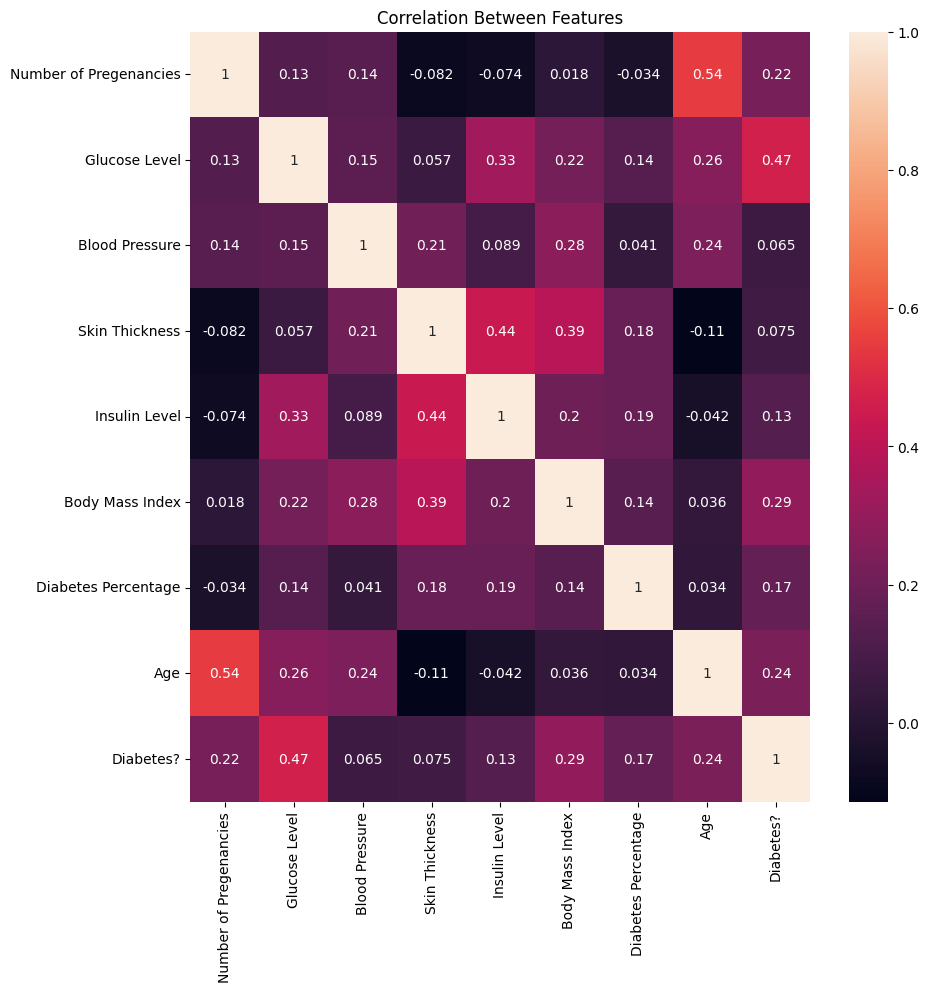

In [10]:
fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(diabetes.corr(), annot = True,)
plt.title("Correlation Between Features")
plt.show()

### There is no real high correlation between the features. However, age vs. # of pregnancies and glucose level vs probabilities of diabetes seems to have moderate correlation.

## Step B.3: Show Histograms of Each Column

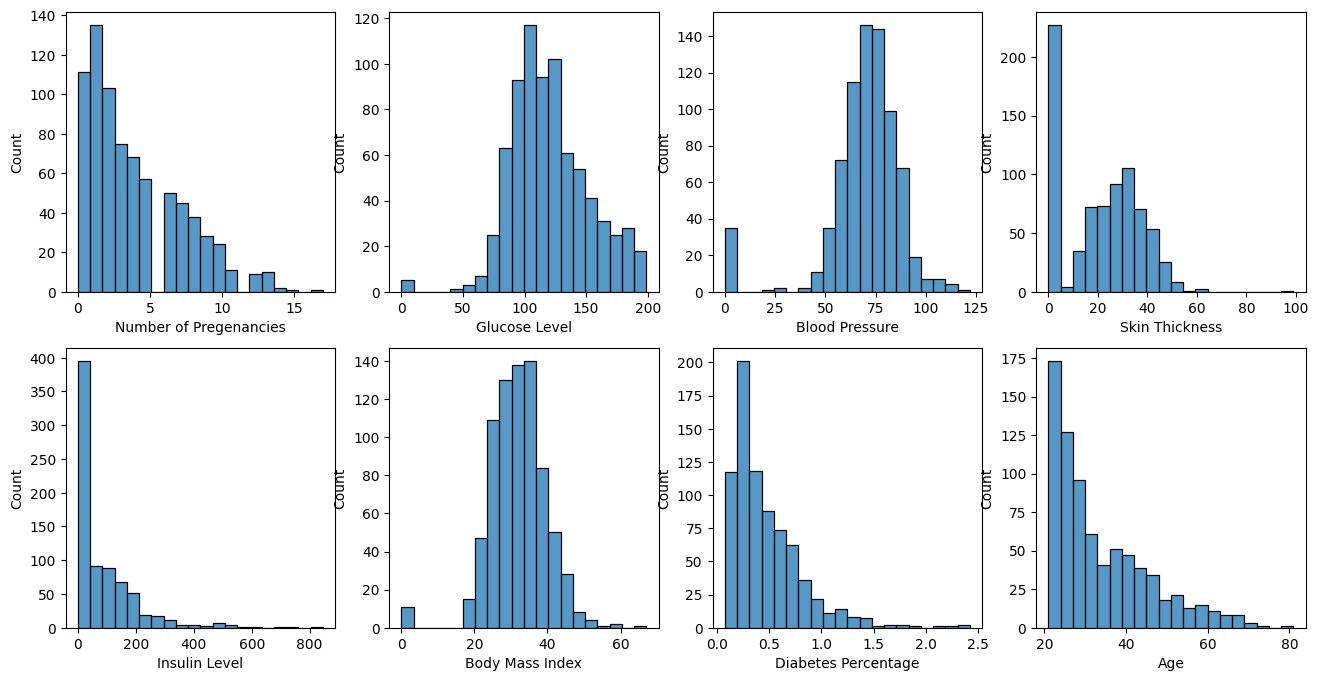

In [11]:
plt.figure(figsize = (16,8))
for i in range(0,len(diabetes.columns)-1):
    plt.subplot(2,4,i+1)
    sns.histplot(diabetes[diabetes.columns[i]],bins=20)

### In each histogram, there seems to be a midpoint where the most common occurrences happen for each feature. However, there are also outliers for certain features.

## Step B.4: Show Box Plot of Each Column

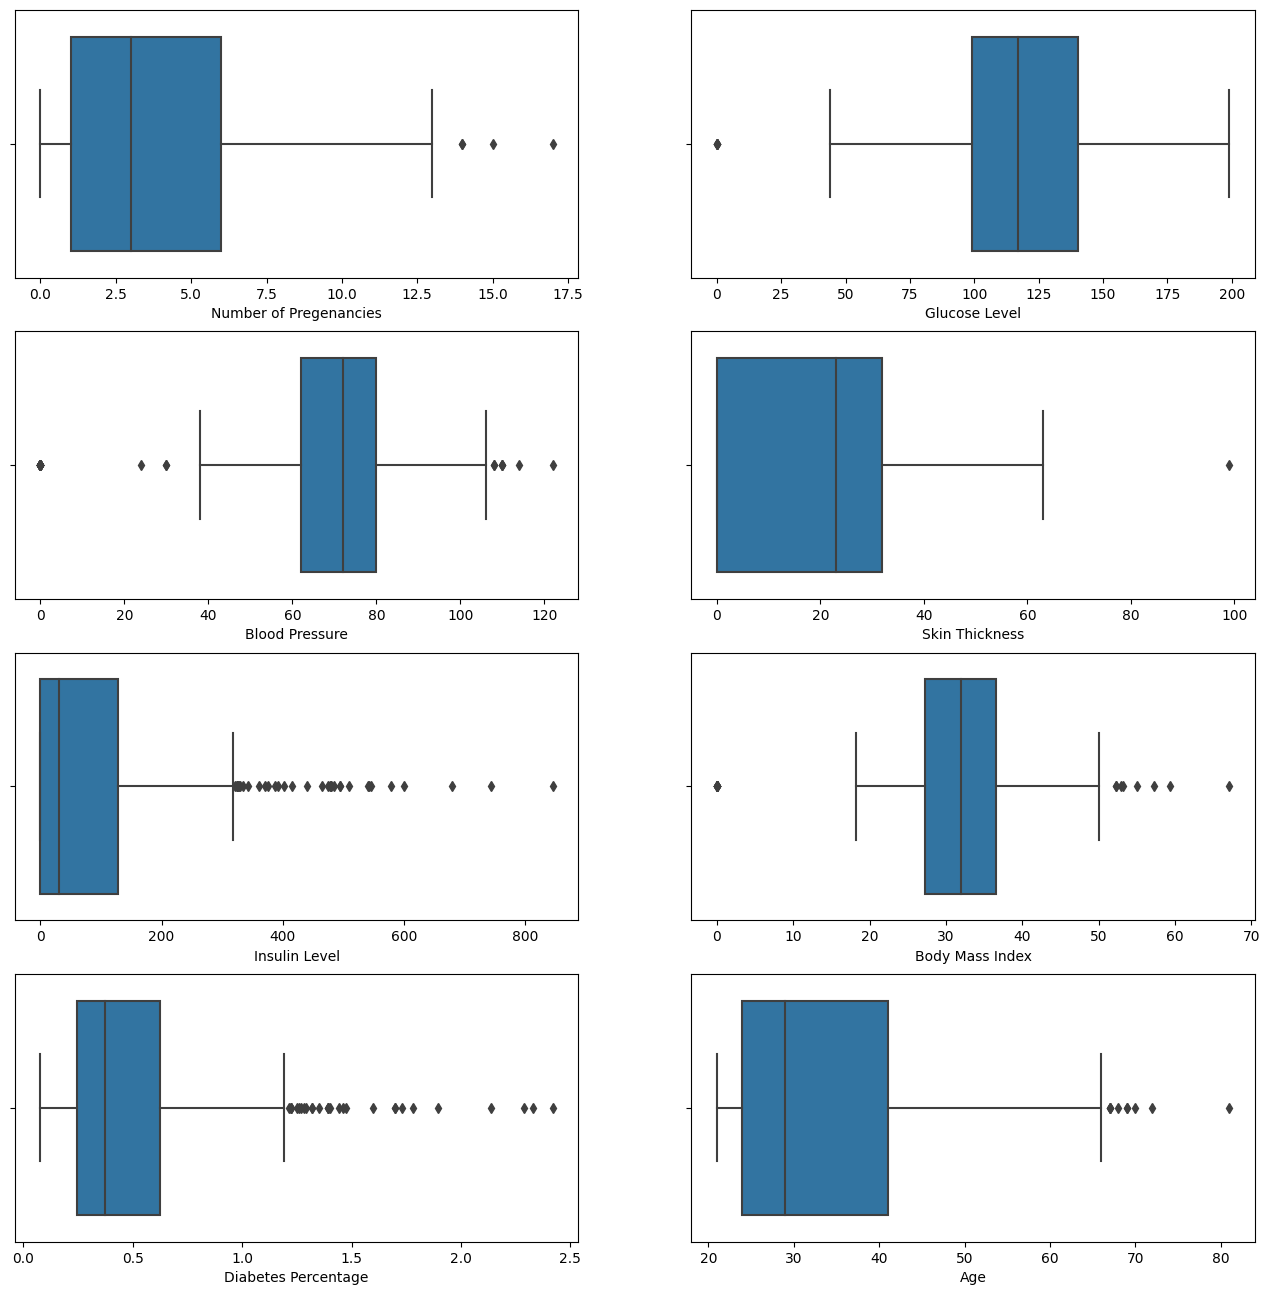

In [12]:
plt.figure(figsize = (16,16))
for i in range(0,len(diabetes.columns)-1):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=diabetes,x=diabetes[diabetes.columns[i]])

### The boxplot continue to explore where the outliers possibly stand for each features.

# Part C: Machine Learning

## Part C.1: Split Dataset into Training and Validation Set

In [13]:
X = diabetes.drop(columns = ['Diabetes?'])
Y = diabetes['Diabetes?']
X, Y

(     Number of Pregenancies  Glucose Level  Blood Pressure  Skin Thickness  \
 0                         6            148              72              35   
 1                         1             85              66              29   
 2                         8            183              64               0   
 3                         1             89              66              23   
 4                         0            137              40              35   
 ..                      ...            ...             ...             ...   
 763                      10            101              76              48   
 764                       2            122              70              27   
 765                       5            121              72              23   
 766                       1            126              60               0   
 767                       1             93              70              31   
 
      Insulin Level  Body Mass Index  Diabetes Per

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 614 Samples are Training Set and 154 Samples are Validation Set

## Part C.2: Scaling Data

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.85811767,  0.06488386,  0.25332145, ..., -0.51313743,
        -1.10316947, -0.27704152],
       [-0.85811767, -0.84697246,  0.66358026, ...,  0.4081093 ,
        -0.71238555,  0.84376203],
       [-1.15412006, -0.87841578,  0.04819205, ...,  1.49569224,
        -0.37742791, -1.05298243],
       ...,
       [ 0.02988949,  0.09632718,  0.04819205, ..., -0.3723914 ,
         1.96433735,  1.01619334],
       [-0.2661129 , -0.18666271,  0.25332145, ..., -0.70506383,
        -1.08260189, -0.79433546],
       [ 0.02988949, -0.37532264, -0.15693736, ...,  0.0114614 ,
        -0.01308802, -0.36325717]])

### The dataset is now standardized with mean = 0.

## Part C.3: Logistic Regression Model Building

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

### Now, a Logistics Model has been built.

## Part C.4: Logistic Regression Implementation

In [17]:
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

### The prediction with the validation set has been printed, but how do we measure the performance?

## Part C.5: Confusion Matrix of the Logistic Regression Model

In [18]:
print('This is the confusion matrix for Logistic Regression :\n', confusion_matrix(y_test, y_pred))

This is the confusion matrix for Logistic Regression :
 [[96 13]
 [23 22]]


### Out of 154 samples, 36 samples are tested falsely, which is roughly 23.38% of the Validation Set

## Part C.6: Accuracy Rate of the Logistic Regression Model

In [19]:
print('This is the Accuracy for the Logistic Regression :\n', accuracy_score(y_test, y_pred))

This is the Accuracy for the Logistic Regression :
 0.7662337662337663


### The accuracy rate is around 76~77%.

## Part C.7: Classification Report of the Logistic Regression Model

In [20]:
print('This is the classification report for the Logistic Regression :\n \n' , classification_report(y_test, y_pred) )

This is the classification report for the Logistic Regression :
 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



### Now, we can look at the precision, recall, and f1-score.

## Part C.8: Grid Search for the Best Parameters in Logistics Regression

In [21]:
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-3,3,7),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

logreg = LogisticRegression()
clf = GridSearchCV(
    logreg,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
clf.fit(X_train_scaled, y_train)

best_params = clf.best_params_
best_params, clf.best_score_

({'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}, 0.7689846641988366)

### The best regularization strength is 0.1. The best penalty is l1. Lastly, the best solver is saga.

## Part C.9: Logistic Regression Model Building with Best Parameters

In [22]:
classifier = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

### Now, the optimal Logistic Regression Model has been built.

## Past C.10: Optimal Logistic Regression Model Implementation

In [23]:
y_pred_clf = classifier.predict(X_test_scaled)
y_pred_clf

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### The optimal prediction with the validation set has been printed, but how do we measure the new performance?

## Part C.11: Confusion Matrix of the Optimal Logistic Regression Model

In [24]:
print('This is the confusion matrix for GridSearchCV :\n', confusion_matrix(y_test, y_pred_clf))

This is the confusion matrix for GridSearchCV :
 [[96 13]
 [25 20]]


### Out of 154 samples, 38 samples are tested falsely, which is roughly 24.68% of the Validation Set

## Part C.12: Accuracy Rate of the Optimal Logistic Regression Model

In [25]:
print('This is the Accuracy for GridSearchCV :\n', accuracy_score(y_test, y_pred_clf))

This is the Accuracy for GridSearchCV :
 0.7532467532467533


### The accuracy rate is around 75~76%.

## Part C.13: Classification Report of the Optimal Logistic Regression Model

In [26]:
print('This is the classification report for GridSearchCV :\n \n' , classification_report(y_test, y_pred_clf) )

This is the classification report for GridSearchCV :
 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       109
           1       0.61      0.44      0.51        45

    accuracy                           0.75       154
   macro avg       0.70      0.66      0.67       154
weighted avg       0.74      0.75      0.74       154



### Both the optimal and the original Logistic Regression Model have the same classification report. However, to choose, the ideal choice is the Optimal Model with the best parameters. To further test this conclusion, new data would be needed.